# Clustering Crypto

In [38]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from path import Path


### Fetching Cryptocurrency Data

In [39]:
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [40]:
# Creating a DataFrame
path = Path('/Users/jiwookkim/Desktop/work/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/13-AWS-Lex/Instructions/Starter_Files/Resources/crypto_data.csv')
df = pd.read_csv(path, index_col='Unnamed: 0')

df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [41]:
df.isnull().sum()

CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

CoinName           0
Algorithm          0
IsTrading          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

### Data Preprocessing

In [44]:
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [46]:
# Keep only cryptocurrencies that are on trading
df.drop(df[df['IsTrading'] == False].index, inplace=True)

In [48]:
# Removing rows with cryptocurrencies without coins mined
df.drop(df[df['TotalCoinsMined'] == 0].index, inplace=True)

In [49]:
# Removing IsTrading
df.drop("IsTrading", axis=1, inplace=True)

In [51]:
# Removing rows with at least 1 null value
df.dropna(inplace=True)

In [52]:
# Fetching the cryptocurrencies names prior to drop them from crypto_df
name = df.copy()

In [53]:
# Removig the cryptocurrency name since it's not going to be used on the clustering algorithm
df.drop('CoinName', axis=1, inplace=True)

In [55]:
# Creating dummies variables for text features
df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])

In [56]:
# Standardizing data
df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
scaled = StandardScaler().fit_transform(df)

### Reducing Dimensions Using PCA

In [58]:
# Using PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)
coin_pca = pca.fit_transform(scaled)

In [60]:
# Creating a DataFrame with the principal components data
coin_pca_df = pd.DataFrame(data=coin_pca, columns=["PCA1", "PCA2", "PCA3"], index=df.index )
coin_pca_df.head()

,PCA1,PCA2,PCA3
42,-0.330747,0.936561,-0.648387
404,-0.314002,0.936999,-0.648805
1337,2.330287,1.701192,-0.765642
BTC,-0.141899,-1.256359,0.239972
ETH,-0.146759,-1.920862,0.380699


### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [61]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(coin_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_curve = {"k": k, "inertia": inertia}
df_curve = pd.DataFrame(elbow_curve)
df_curve.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=<you best value for k here>`

In [63]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(coin_pca_df)
# Predict clusters
predictions = model.predict(coin_pca_df)
# Creating a new DataFrame including predicted clusters and cryptocurrencies features
coin_pca_df["class"] = model.labels_
coin_pca_df.head()

,PCA1,PCA2,PCA3,class
42,-0.330747,0.936561,-0.648387,3
404,-0.314002,0.936999,-0.648805,3
1337,2.330287,1.701192,-0.765642,3
BTC,-0.141899,-1.256359,0.239972,0
ETH,-0.146759,-1.920862,0.380699,0


### Visualizing Results

#### 3D-Scatter with Clusters

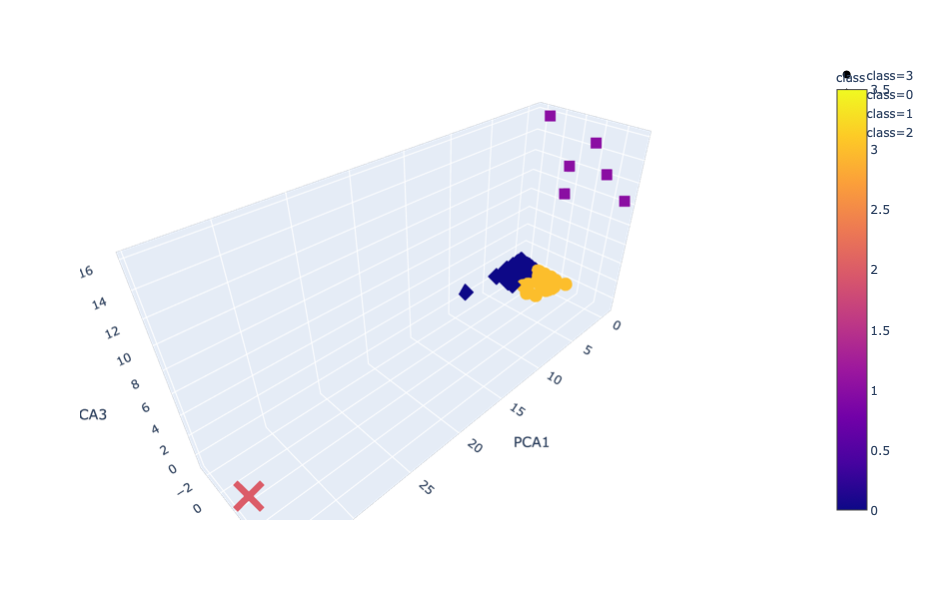

In [66]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(coin_pca_df, x="PCA1", y="PCA2", z="PCA3", color="class", symbol="class", width=600)
fig.show()

#### Table of Tradable Cryptocurrencies

In [68]:
# Table with tradable cryptos
clustered = pd.merge(name, coin_pca_df, left_index=True, right_index=True)
clustered.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PCA1,PCA2,PCA3,class
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.330747,0.936561,-0.648387,3
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.314002,0.936999,-0.648805,3
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2.330287,1.701192,-0.765642,3
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.141899,-1.256359,0.239972,0
ETH,Ethereum,Ethash,PoW,1.076842e+08,0,-0.146759,-1.920862,0.380699,0


#### Scatter Plot with Tradable Cryptocurrencies

In [72]:
# Scaling data to create the scatter plot
features = clustered.copy()

#selecct columns to scale
columns_names = ['TotalCoinsMined', 'TotalCoinSupply']
features_1 = features[columns_names]

#scale with MinMaxScaler scaler
scaler = MinMaxScaler().fit(features_1.values)
features_1 = scaler.transform(features_1.values)

#amend columns with scaled values
features[columns_names] = features_1
features

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PCA1,PCA2,PCA3,class
42,42 Coin,Scrypt,PoW/PoS,0.005942,4.200000e-11,-0.330747,0.936561,-0.648387,3
404,404Coin,Scrypt,PoW/PoS,0.007002,5.320000e-04,-0.314002,0.936999,-0.648805,3
1337,EliteCoin,X13,PoW/PoS,0.035342,3.141593e-01,2.330287,1.701192,-0.765642,3
BTC,Bitcoin,SHA-256,PoW,0.005960,2.100000e-05,-0.141899,-1.256359,0.239972,0
ETH,Ethereum,Ethash,PoW,0.006050,0.000000e+00,-0.146759,-1.920862,0.380699,0
...,...,...,...,...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,0.007951,2.000000e-03,2.422778,0.727142,0.174718,3
GAP,Gapcoin,Scrypt,PoW/PoS,0.005957,2.500000e-04,-0.328782,0.936478,-0.648413,3
BDX,Beldex,CryptoNight,PoW,0.006927,1.400223e-03,0.333842,-2.229507,0.477517,0
ZEN,Horizen,Equihash,PoW,0.005950,2.100000e-05,-0.143021,-1.983702,0.379036,0


In [73]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
features.hvplot(kind ='scatter', x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName","Algorithm"])

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName,Algorithm)